In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [56]:
#Import the dataset
#df = pd.read_csv('train.csv')
df = pd.read_csv('../processed_data/train_full.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
0,1,60,rl,65,8450,pave,nothing,reg,lvl,allpub,...,nothing,nothing,nothing,0,2,2008,wd,normal,208500,12.24769
1,2,20,rl,80,9600,pave,nothing,reg,lvl,allpub,...,nothing,nothing,nothing,0,5,2007,wd,normal,181500,12.10901
2,3,60,rl,68,11250,pave,nothing,ir1,lvl,allpub,...,nothing,nothing,nothing,0,9,2008,wd,normal,223500,12.31717
3,4,70,rl,60,9550,pave,nothing,ir1,lvl,allpub,...,nothing,nothing,nothing,0,2,2006,wd,abnorml,140000,11.84940
4,5,60,rl,84,14260,pave,nothing,ir1,lvl,allpub,...,nothing,nothing,nothing,0,12,2008,wd,normal,250000,12.42922


In [ ]:
#Dummify columns with categorical values
def make_dummy_df(df, cols) :
    for x in cols:
        dums = pd.get_dummies(df[x], drop_first=True, prefix=x)
        df = pd.concat((df, dums), axis=1)
        df.drop([x], axis=1, inplace=True)
    return df

# Exploratory Data Analysis

## Data Distribution

mu = 180921.20, sigma = 79415.29


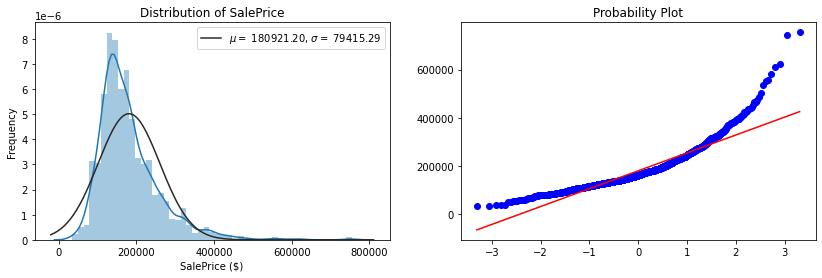

In [67]:
#Check distribution of SalePrice and QQ plot 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
sns.distplot(df['SalePrice'], fit=norm, ax = ax1)

#Find mean and standard deviation
(mu, sigma) = norm.fit(df['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))

#Set labels and legend 
ax1.legend(['$\mu=$ {:.2f}, $\sigma=$ {:.2f}'.format(mu, sigma)],loc='best')
ax1.set_xlabel('SalePrice ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of SalePrice')

#QQ plot
ax2 = plt.subplot(122)
res = stats.probplot(df['SalePrice'], plot=plt)
#plt.show()
plt.savefig("../output/saleprice_distribution.png")

mu = 180921.20, sigma = 79415.29


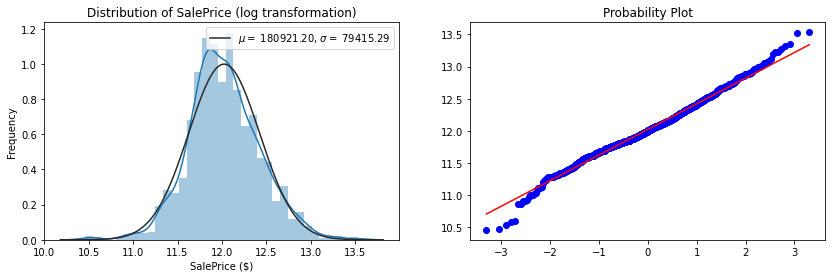

In [66]:
#Check distribution of log-transformed SalePrice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
sns.distplot(df.logSalePrice, fit=norm, ax = ax1)

#Find mean and standard deviation
(mu, sigma) = norm.fit(df['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))

#Set labels and legend 
ax1.legend(['$\mu=$ {:.2f}, $\sigma=$ {:.2f}'.format(mu, sigma)],loc='best')
ax1.set_xlabel('SalePrice ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of SalePrice (log transformation)')

#QQ plot
ax2 = plt.subplot(122)
res = stats.probplot(df.logSalePrice, plot=plt)
#plt.show()
plt.savefig("../output/salepricelog_distribution.png")

## Data Correlation with SalePrice

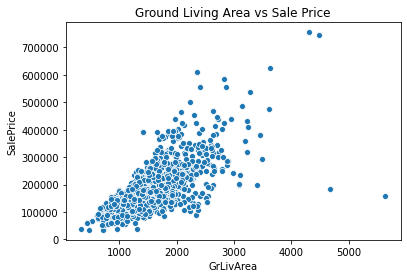

In [29]:
# GrLivArea vs SalePrice
ax = sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df)
ax.set_title("Ground Living Area vs Sale Price")
plt.savefig("../output/grlivarea_saleprice.png")

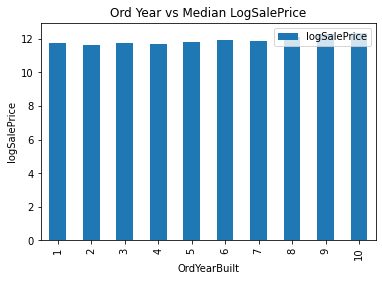

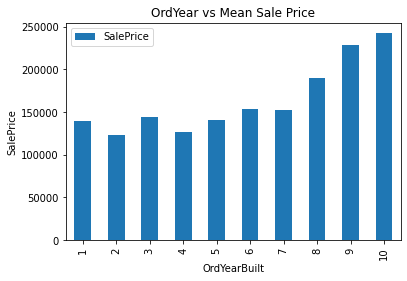

In [40]:
# check if YearBuilt should be ordinal or nominal
def year_to_group2(year):
    if year < 1920:
        return 1
    elif year > 1999:
        return 10
    else:
        return int(list(str(year))[2])
df['OrdYearBuilt'] = df['YearBuilt'].map(year_to_group2)
df.groupby('OrdYearBuilt').agg('mean').plot(y='logSalePrice',kind='bar', title = 'Ord Year vs Median LogSalePrice')
plt.ylabel("logSalePrice")
plt.savefig("../output/salepricelog_yearbuilt.png")
df.groupby('OrdYearBuilt').agg('mean').plot(y='SalePrice',kind='bar', title = 'OrdYear vs Mean Sale Price')
plt.ylabel("SalePrice")
plt.savefig("../output/saleprice_yearbuilt.png")

## SalePrice distribution by Category

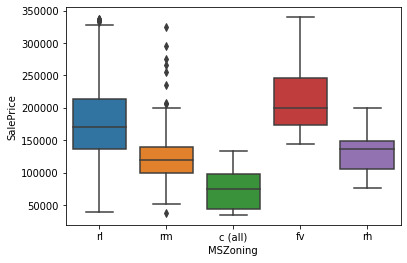

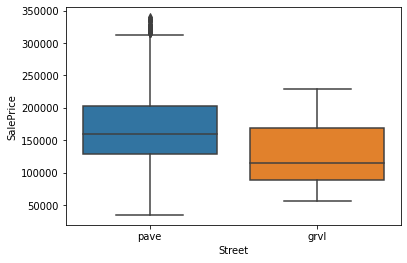

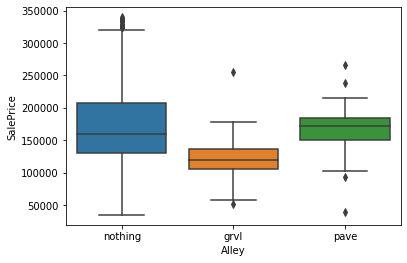

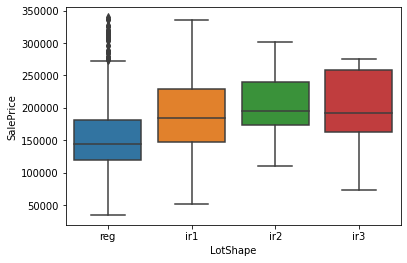

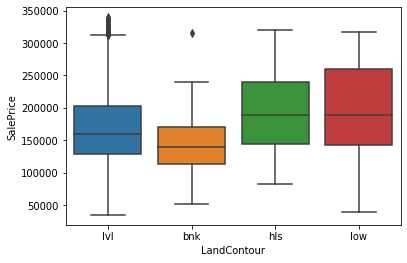

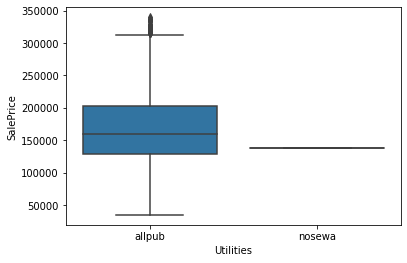

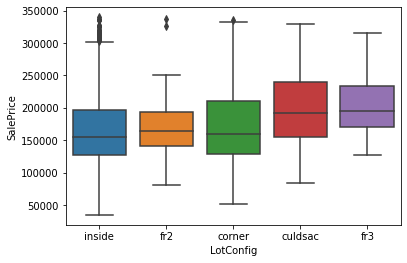

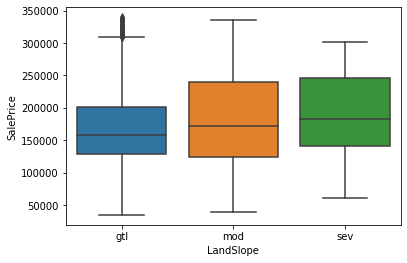

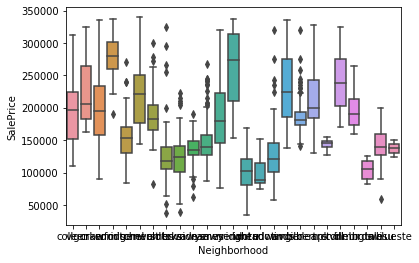

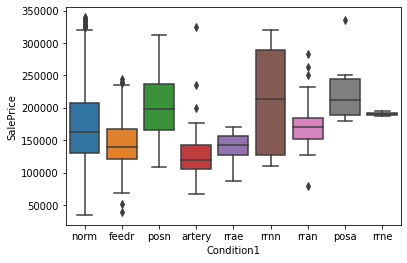

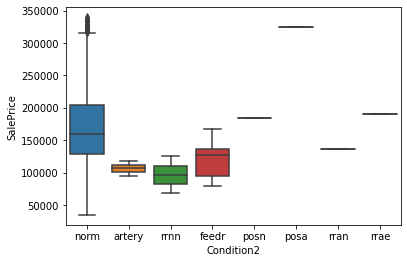

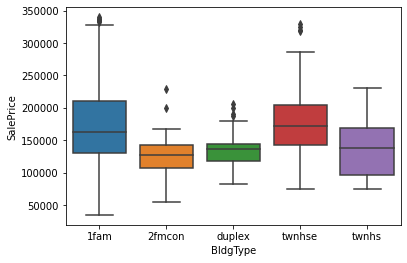

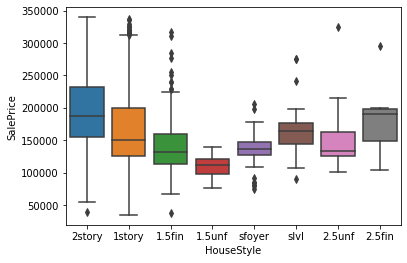

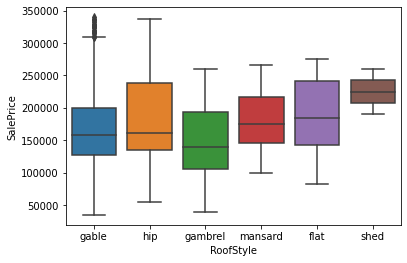

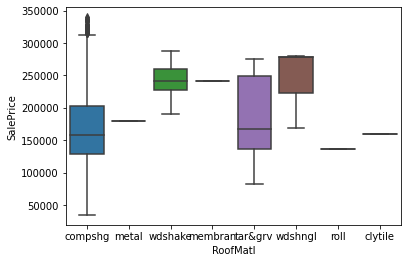

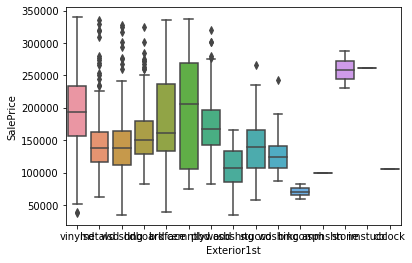

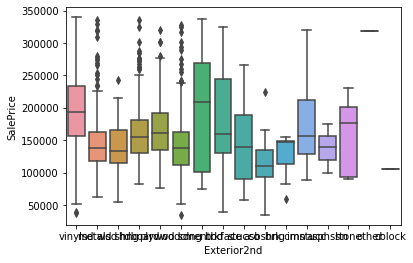

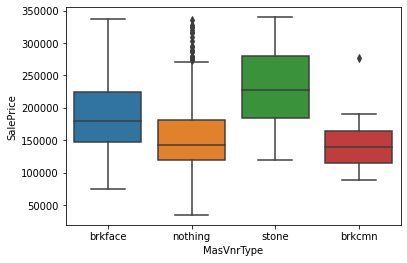

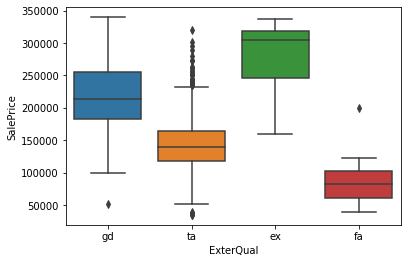

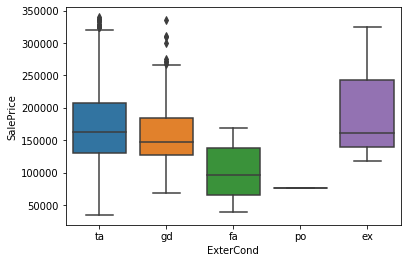

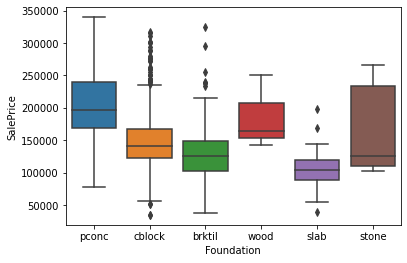

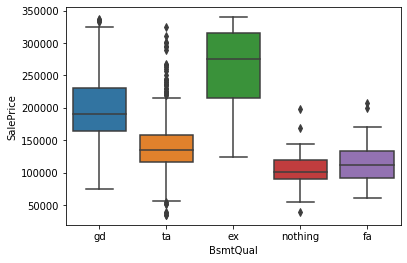

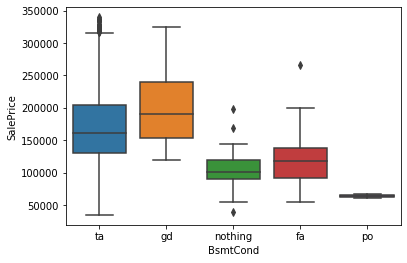

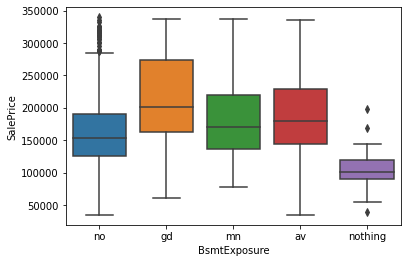

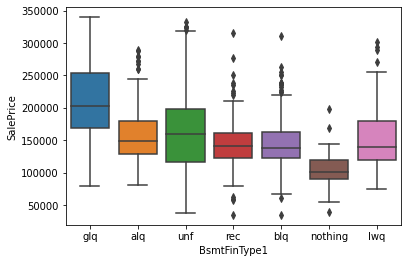

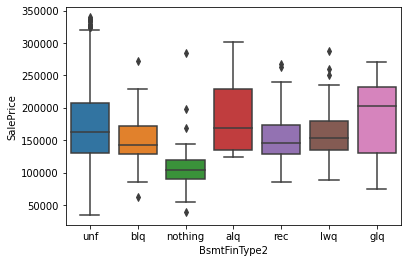

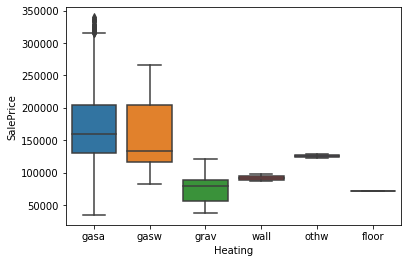

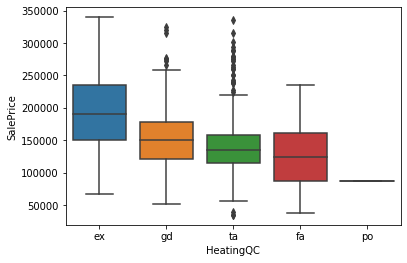

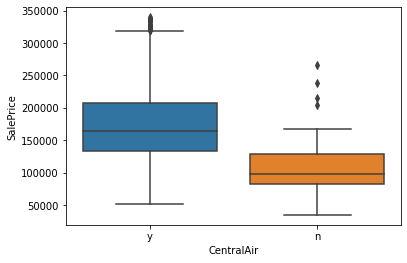

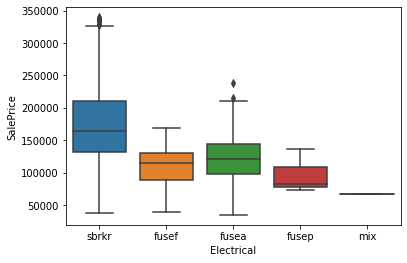

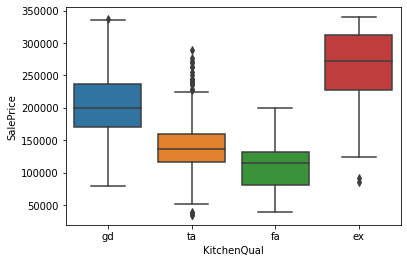

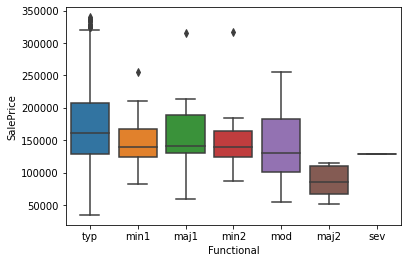

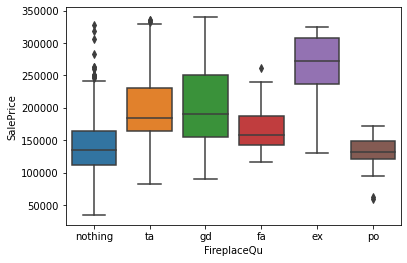

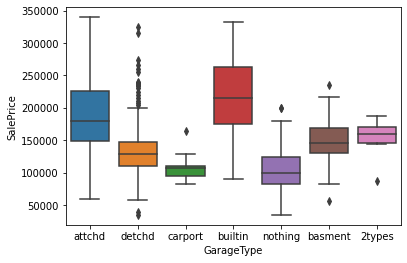

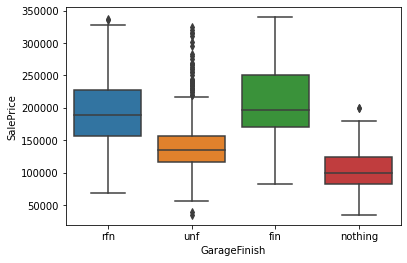

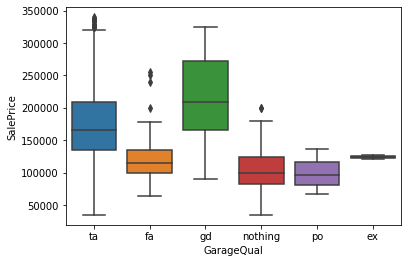

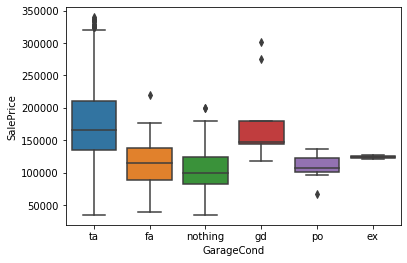

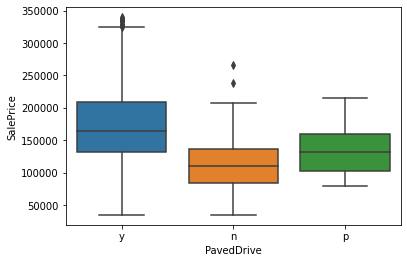

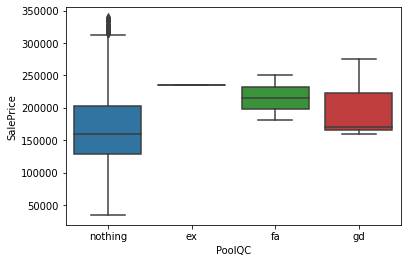

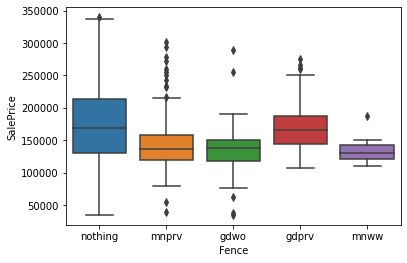

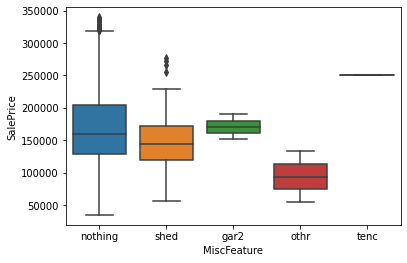

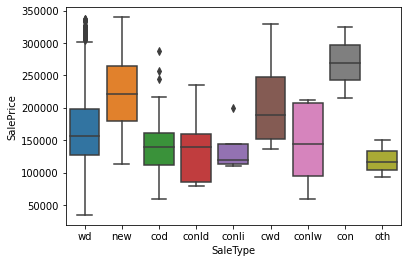

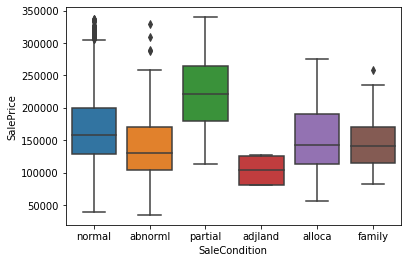

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [53]:
# group boxplots
df_saleprice_c = df[df.SalePrice.apply(lambda x: np.abs(x-df.SalePrice.mean())/df.SalePrice.std() < 2)] # 95% of data
#print(sns.boxplot(x='LotShape', y='SalePrice', data=df_saleprice_c))
def boxplot_saleprice(df, col):
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.show()

#boxplot_saleprice(df_saleprice_c, 'LandSlope')
list(map(lambda x: boxplot_saleprice(df_saleprice_c, x), cate_features))

## Correlation Matrix: numeric predictors

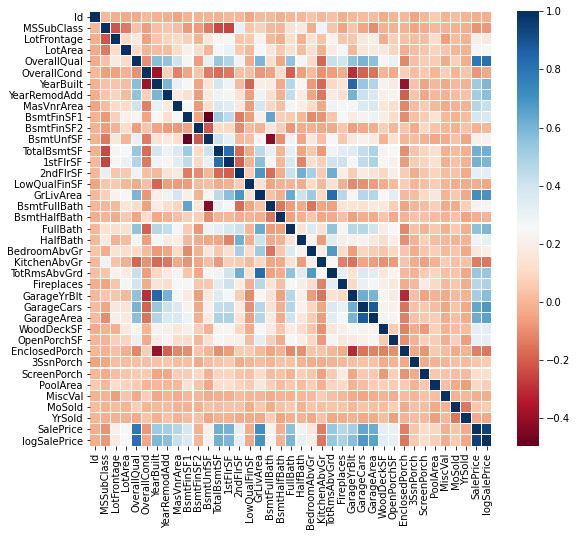

In [57]:
#Create a correlation heatmap 
corrmat = df.corr() 
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap =colormap, linewidths = 0.1)
plt.savefig("../output/correlation_matrix.png")

In [111]:
#Check which features have the highest correlation with each other
corr_features = corrmat.unstack()
high_corr = corr_features[(abs(corr_features)>0.3) & (abs(corr_features) < 1)]
display(high_corr)

MSSubClass    2ndFlrSF        0.307886
OverallQual   YearBuilt       0.572323
              YearRemodAdd    0.550684
              MasVnrArea      0.407252
              BsmtUnfSF       0.308159
                                ...   
logSalePrice  GarageCars      0.680625
              GarageArea      0.650888
              WoodDeckSF      0.334135
              OpenPorchSF     0.321053
              SalePrice       0.948374
Length: 236, dtype: float64

In [117]:
print('OverallQual' in high_corr)
print('Street' in high_corr)
print('SaleCondition' in high_corr)
print('SaleType' in high_corr)
print('Heating' in high_corr)
print('Neighborhood' in high_corr)
print('Exterior1st' in high_corr)
print('RoofMatl' in high_corr)

True
False
False
False
False
False
False
False


In [ ]:
plt.figure(figsize=(6,6))
plt.title('SalePrice Correlation with Features')
sns.barplot(y='feature',x='corr', data=corr_df)

## Anova Table: Categorical predictors

In [52]:
# select categorical fetures
cate_features = df[df.applymap(np.isreal) == False].dropna(axis = 1).columns.tolist()
## anova of categorical predictors (all combination t-test later?)
model = ols('SalePrice ~C(LandSlope)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
#display(anova_table)

test_col = 'LandSlope'
compare = "SalePrice ~C(" + test_col + ")"
model = ols(compare, data = df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
#display(anova_table)
#type(anova_table)

def anova_test(df, test_col):
    compare = "logSalePrice ~C(" + test_col + ")"
    model = ols(compare, data = df).fit()
    anova_table = sm.stats.anova_lm(model, typ = 2)
    return anova_table
#display(anova_test(df, "LandSlope"))

anova_list = list(map(lambda x: anova_test(df, x), cate_features))
for item in anova_list:
    display(item)

,sum_sq,df,F,PR(>F)
C(MSZoning),40.935392,4.0,77.607871,1.021294e-59
Residual,191.865186,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Street),0.766199,1.0,4.814454,0.028379
Residual,232.034378,1458.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Alley),6.433954,2.0,20.705949,1.358141e-09
Residual,226.366623,1457.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(LotShape),20.445859,3.0,46.728686,7.857777e-29
Residual,212.354718,1456.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(LandContour),5.967116,3.0,12.767253,3.086302e-08
Residual,226.833462,1456.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Utilities),0.037148,1.0,0.232688,0.62961
Residual,232.763430,1458.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(LotConfig),5.433332,4.0,8.692432,6.214662e-07
Residual,227.367246,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(LandSlope),0.345576,2.0,1.083016,0.338845
Residual,232.455001,1457.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Neighborhood),132.884321,24.0,79.520343,4.044965e-243
Residual,99.916257,1435.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Condition1),9.878676,8.0,8.037545,1.173347e-10
Residual,222.921901,1451.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Condition2),2.802771,7.0,2.52774,0.01382
Residual,229.997807,1452.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(BldgType),9.344720,4.0,15.211692,3.436634e-12
Residual,223.455858,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(HouseStyle),23.768132,7.0,23.585762,1.636076e-30
Residual,209.032446,1452.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(RoofStyle),10.033179,5.0,13.097287,1.705723e-12
Residual,222.767398,1454.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(RoofMatl),4.167117,7.0,3.780633,0.00045
Residual,228.633460,1452.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Exterior1st),42.260539,14.0,22.892256,1.053205e-53
Residual,190.540038,1445.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Exterior2nd),39.916557,15.0,19.921992,2.430134e-49
Residual,192.884020,1444.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(MasVnrType),43.800141,3.0,112.474175,1.670334e-65
Residual,189.000437,1456.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(ExterQual),107.349426,3.0,415.303122,6.936737e-195
Residual,125.451151,1456.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(ExterCond),10.595449,4.0,17.34476,6.540087e-14
Residual,222.205128,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Foundation),70.690179,5.0,126.80682,1.350502e-111
Residual,162.110398,1454.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(BsmtQual),105.295963,4.0,300.392318,2.031296e-188
Residual,127.504614,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(BsmtCond),20.169519,4.0,34.504191,1.492473e-27
Residual,212.631058,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(BsmtExposure),33.547465,4.0,61.243161,7.260282e-48
Residual,199.253113,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(BsmtFinType1),52.998861,6.0,71.38173,4.321683e-78
Residual,179.801716,1453.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(BsmtFinType2),10.074525,6.0,10.953879,5.805282e-12
Residual,222.726052,1453.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Heating),7.669819,5.0,9.907057,2.484252e-09
Residual,225.130759,1454.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(HeatingQC),54.362986,4.0,110.820461,1.614818e-82
Residual,178.437591,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(CentralAir),28.779459,1.0,205.667193,9.854733e-44
Residual,204.021119,1458.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Electrical),22.469492,4.0,38.859105,6.080713e-31
Residual,210.331086,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(KitchenQual),104.210742,3.0,393.319943,4.442417e-187
Residual,128.589836,1456.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Functional),5.538055,6.0,5.901247,0.000004
Residual,227.262523,1453.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(FireplaceQu),72.377106,5.0,131.198147,6.967175e-115
Residual,160.423472,1454.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(GarageType),77.904160,6.0,121.796173,8.431439e-125
Residual,154.896417,1453.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(GarageFinish),88.704827,3.0,298.769457,4.058570e-151
Residual,144.095751,1456.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(GarageQual),32.907601,5.0,47.873269,6.068462e-46
Residual,199.892977,1454.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(GarageCond),33.792536,5.0,49.379259,2.508050e-47
Residual,199.008041,1454.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(PavedDrive),21.703265,2.0,74.898293,1.090856e-31
Residual,211.097313,1457.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(PoolQC),1.895986,3.0,3.985132,0.007696
Residual,230.904591,1456.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Fence),9.868964,4.0,16.102856,6.560887e-13
Residual,222.931614,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(MiscFeature),2.294757,4.0,3.621245,0.00606
Residual,230.505820,1455.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(SaleType),27.962929,8.0,24.759981,5.498063e-36
Residual,204.837648,1451.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(SaleCondition),30.035900,5.0,43.076733,1.689630e-41
Residual,202.764677,1454.0,NaN,NaN


## Feature Engineering Pilot

In [58]:
#Create new features

#Combine bath variables into TotalBathrooms to check if correlation is higher with SalePrice
df['TotalBathrooms'] = df['FullBath'] + (df['HalfBath'] * 0.5) + df['BsmtFullBath'] + (df['BsmtHalfBath'] * 0.5)

#Combine porch variables except WoodenDeck to check if correlation is higher with SalePrice
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

#Combine square footage above and below ground to give total square footage of the house
df['TotalSqrFeet'] = df['GrLivArea'] + df['TotalBsmtSF']

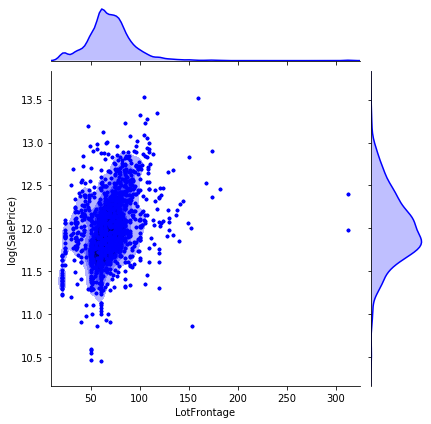

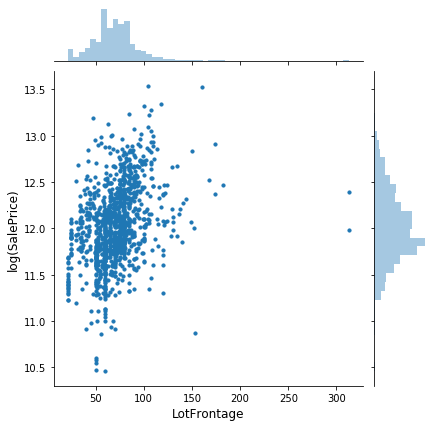

In [47]:
#Check which features in the dataset are skewed 
g1 = sns.jointplot(df['LotFrontage'], y_log, data=df, kind="kde", color="b")
g1.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker=".")
g1.ax_joint.collections[0].set_alpha(0)
g1.set_axis_labels("LotFrontage", "log(SalePrice)")

g2 = sns.jointplot(df['LotFrontage'],y_log, s = 10)
g1.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker=".")
g2.set_axis_labels('LotFrontage', 'log(SalePrice)', fontsize=12)